<a href="https://colab.research.google.com/github/SilvaCapixaba/biblioteca_pandas/blob/main/Expansao_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
vendas = pd.read_excel("/content/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042,Erro
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,Correto
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,Correto
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,Correto
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,Correto


In [5]:
#Explorando as informações nos dados
#existem dados nulos? SIM! Coluna "PREÇO" e Coluna "ESTADO" OBS. que os numeros de linhas não bate com numero de linhas total do documento
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   regra              80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [6]:
#NUNIQUE - e para vizualizar as categorias que temos nesta coluna
#
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [7]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [8]:
#Verificando as categorias da coluna departamento
#Observei que tem nomes com espaço nesta coluna - mas para frente vou colocar o 'anderline' para unir
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [9]:
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [10]:
#Fazendo união dos nomes: (antes tinha espaço) agora unidos com 'anderline' ou sinal que eu desejava
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [11]:
#VERIFICANDO DADOS NULLOS
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   regra              80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [12]:
#VISUALIZANDO NA COLUNA DADOS NULOS - PARA TRATAMENTO MAIS A FRENTE
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804,Correto
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359,Correto
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691,Correto
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024,Correto
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121,Correto
...,...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873,Correto
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772,Correto
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399,Correto
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784,Correto


In [13]:
#TESTE: tirando dados nullos - VISUALIZANDO
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
 9   regra              79926 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.7+ MB


In [14]:
#DADOS NULLOS TRATADOS
#A PREMISSA PASSADA PELA EMPRESA E PREENCHER COM OS ESTADOS NULLOS COM "MS" (mato grosso do sul)
#Vamos preencher os dados nullos - temos dois codgos para fazer - um com mais codgos outro com menos codgo
#vendas["estado"].fillna("MS", inplace=True) #este e o metodo inplace
vendas["estado"] = vendas["estado"].fillna("MS") #substituindo os dados nullos por 'MS' - VERIFICAR TOTAL DE LINHAS X TOTAL LINHAS NAS COLUNAS
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   regra              80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [15]:
#AGORA VAMOS TRATAR AS COLUNA PREÇO - A PREMISSA E COLOCAR O VALOR MEDIO NA CELULA NULLA
#vendas["Preço"].fillna(1000, inplace= True) #PARA SUBSTITUIR O VALOR POR 1000
media_preco = vendas["Preço"].mean() #vamos tirar a média
vendas["Preço"].fillna(media_preco, inplace= True) #REALIZANDO A SUBSTITUIÇÃO

In [16]:
media_preco

906.5891285439033

In [17]:
#VIZUALIZANDO A SUBSTITUIÇÃO DOS DADOS NULLOS
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   regra              80228 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [18]:
#vizualização ápos correções
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042,Erro
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,Correto
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,Correto
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,Correto
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,Correto


In [19]:
#REALIZANDO ESTÁTISTICA
#STD- desvio padrão maior que mean "quer dizer que tem variação grande de valores de compras"

vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [20]:
#VIZUALIZANDO  DADOS "PREÇO" DO PRODUTO - MAIOR QUE "PREÇO_COM_FRETE"
#Na premissa da empresa: se o valor do produto for maior que o valor do produto com frete / esta incorreto
#devo concertar

preco_errado = vendas.query("Preço > Preço_com_frete")
preco_errado.head(10)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
0,393835,Mobile,A,2023-03-05,1582.560000,791.280,Telefones_e_Celulares,SP,15042,Erro
96,382380,Internet,A,2023-04-26,906.589129,879.200,Telefones_e_Celulares,MS,5804,Correto
118,106845,Mobile,A,2023-03-04,658.400000,329.200,Eletroportateis,BA,14702,Erro
119,107130,Mobile,A,2023-04-24,2398.400000,1207.120,Eletrodomesticos,SC,26746,Erro
120,165450,Mobile,A,2023-04-17,612.960000,317.128,Bebes,SP,11677,Erro
121,242170,Aplicativo,B,2023-01-08,6318.400000,3159.200,Informatica,RJ,26595,Erro
122,252395,Aplicativo,B,2023-01-08,4478.400000,2239.200,TVs_e_Acessorios,MG,22306,Erro
123,269885,Mobile,B,2023-04-27,4318.400000,2169.520,TVs_e_Acessorios,SP,25168,Erro
124,271830,Internet,A,2023-03-19,783.840000,391.920,Utilidades_Domesticas,ES,11059,Erro
125,291695,Aplicativo,B,2023-01-17,2206.400000,1103.200,Telefones_e_Celulares,BA,13359,Erro


In [21]:
#MINHA TABELA PRINCIPAL QUE ESTA CORRETA! aQUI "PREÇO_COM_FRETE" E MAIOR
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto


In [22]:
#FAZENDO UMA ESTATISTICA
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [23]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto


In [24]:
#VAMOS REALIZAR ALGUNS FILTROS - VIZUALIZAÇÃO VENDAS POR DEPARATEMENTO
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [25]:
#DEPARATEMNTOS MAIS VENDIDOS
#.sort_values(ascending=False) - e para eu pegar do maior para o menor
#reset.index - para ficar formato de tabela tipo frame
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [26]:
#MEDIA DE PREÇO COM FRETE POR DEPARTAMENTO
#round() - ESTA FUNÇÃO E PARA DEFINIR QUANTAS CASAS DECIMAIS QUERO TER NA MINHA TABELA
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [27]:
#QUANTIDADE DE VENDAS POR MÊS
#PROXIMO CODGO VOU AGRUPAR AS VENDAS POR MÊS
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=True)

,idcompra
Data,
2023-02-12,152
2023-02-22,156
2023-02-25,161
2023-03-28,162
2023-04-14,162
...,...
2023-03-30,214
2023-02-20,214
2023-03-07,215


In [28]:
#VOU CRIAR UMA COLUNA COM O NUMERO REFERENTE AO MÊS - ESTOU CRIANDO A COLUNA 'MÊS' ESTA NO FINAL DA TABELA
#NO PROXIMO  CODGO VOU AGRUPAR A DATA POR MES COM AS VENDAS
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head(10)

<ipython-input-28-68087e705f19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,Correto,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,Correto,2
25,422515,Internet,B,2023-03-02,319.20,323.120,Acessorios_e_Inovacoes,SP,11655,Correto,3
26,437040,Internet,B,2023-03-20,151.92,155.912,Eletroportateis,PR,19778,Correto,3
29,25,Internet,A,2023-04-14,87.92,91.912,Eletroportateis,RS,11987,Correto,4
33,94950,Internet,A,2023-01-18,83.92,87.112,Bebes,SP,7076,Correto,1
35,156185,Internet,A,2023-02-24,87.92,95.912,Eletroportateis,RJ,15712,Correto,2


In [29]:
#AGORA ESTOU AGRUPANDO A QUANTIDADE DE VENDAS POR MÊS
#.reset_index() - CRIANDO TABELA DATAFRAME
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False).reset_index()

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


### Vamos trabalhar a segunda base *cliente_varejo*
***vamos fazer união das tabelas***
***chama-se join***

In [30]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [31]:
#entendendo os dados
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [32]:
#Verificando tipos de dados
#vamos transformar renda em float
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [33]:
#TRANSFORMANDO COLUNA 'RENDA' EM TIPO FLOAT
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [34]:
#FAZENDO UNIÃO ENTRE DUAS TABELAS - fazendo JOIN
#merge - sig união
#cliente - e a tabela
#how - como quero fazer - "left" - quero trazer da segunda para dentro da primeira
#on="cliente_log"
vendas_cliente = vendas_correto.merge(cliente, how= "left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,regra,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,Correto,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,Correto,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,Correto,2,78,6596.0


In [35]:
#MÉDIA DE RENDA PARA CADA TIPO DE CANAL DE VENDA
#round - e para arredondamento  --- .sort_values(e par5a classificação maio para menor)  ---- .reser_index() para fica tipo frame
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [36]:
#MÉDIA DE IDADE DE CLIENTES POR BANDEIRA
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


### MatprotLib
***Aplicação de Date Vizualisation***

In [37]:
import matplotlib.pyplot as plt

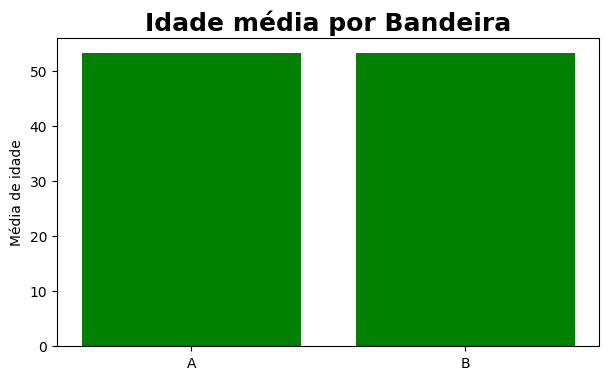

In [38]:
fig = plt.figure(figsize=(7,4)) #tamanho da figura

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green") #definição do eixo x

plt.ylabel("Média de idade")

plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

Text(0.5, 1.0, 'Renda média por canal de venda')

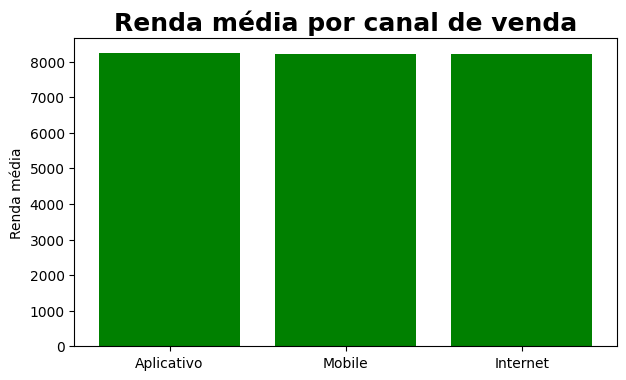

In [39]:
fig = plt.figure(figsize=(7,4)) #tamanho da figura
#Primeiro vem dados para eixo 'x' --- 2° dados 'numeros' para eixo 'y'
plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Renda média") #titulo do eixo 'y'

plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black") #especificações do titulo principal

In [40]:
#Vamos colar dentro do grafico de linha
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


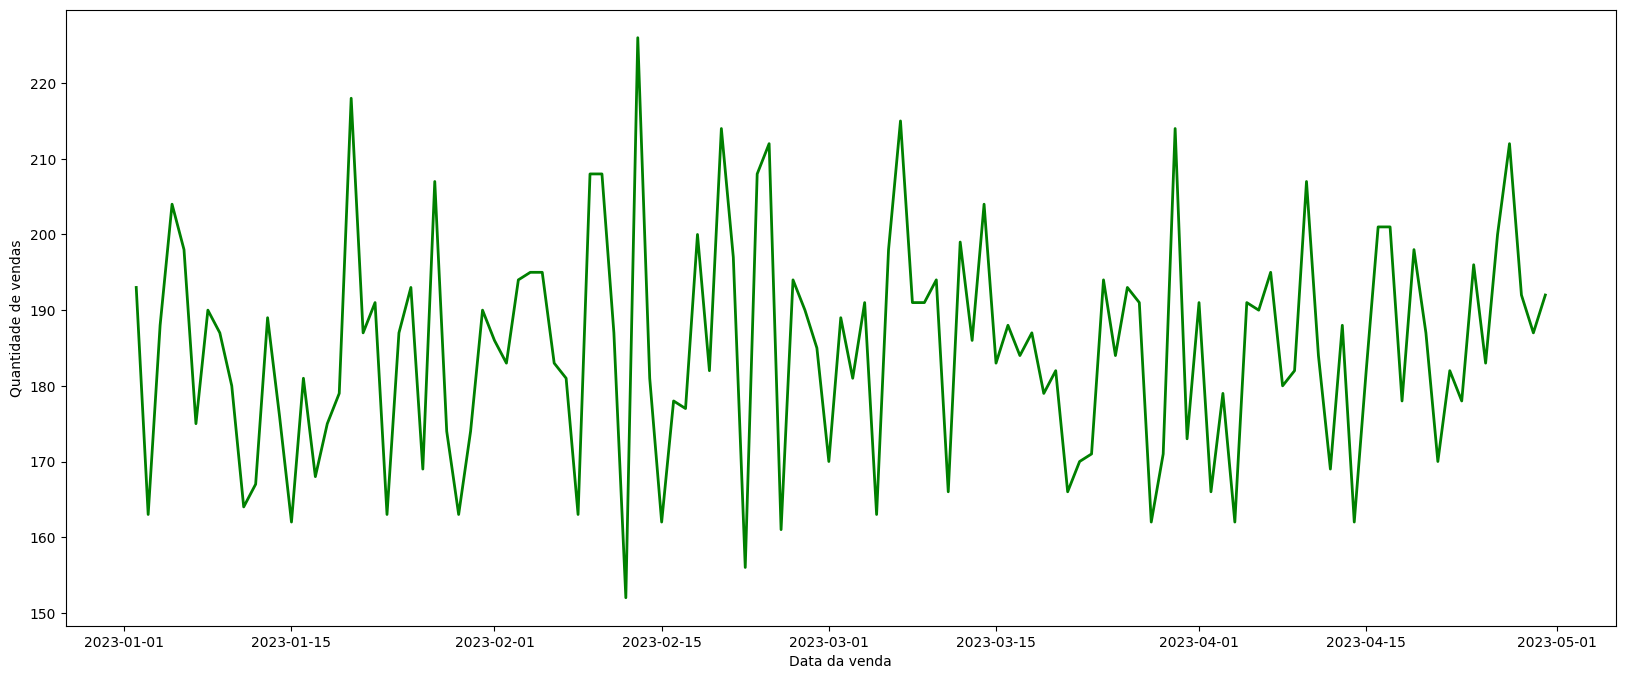

In [41]:
fig = plt.figure(figsize=(20,8))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = venda_por_data["Data"]
y= venda_por_data["idcompra"]

plt.plot(x,y, color = "green", linewidth = 2)
plt.show()

In [42]:
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Preço médio por departamento')

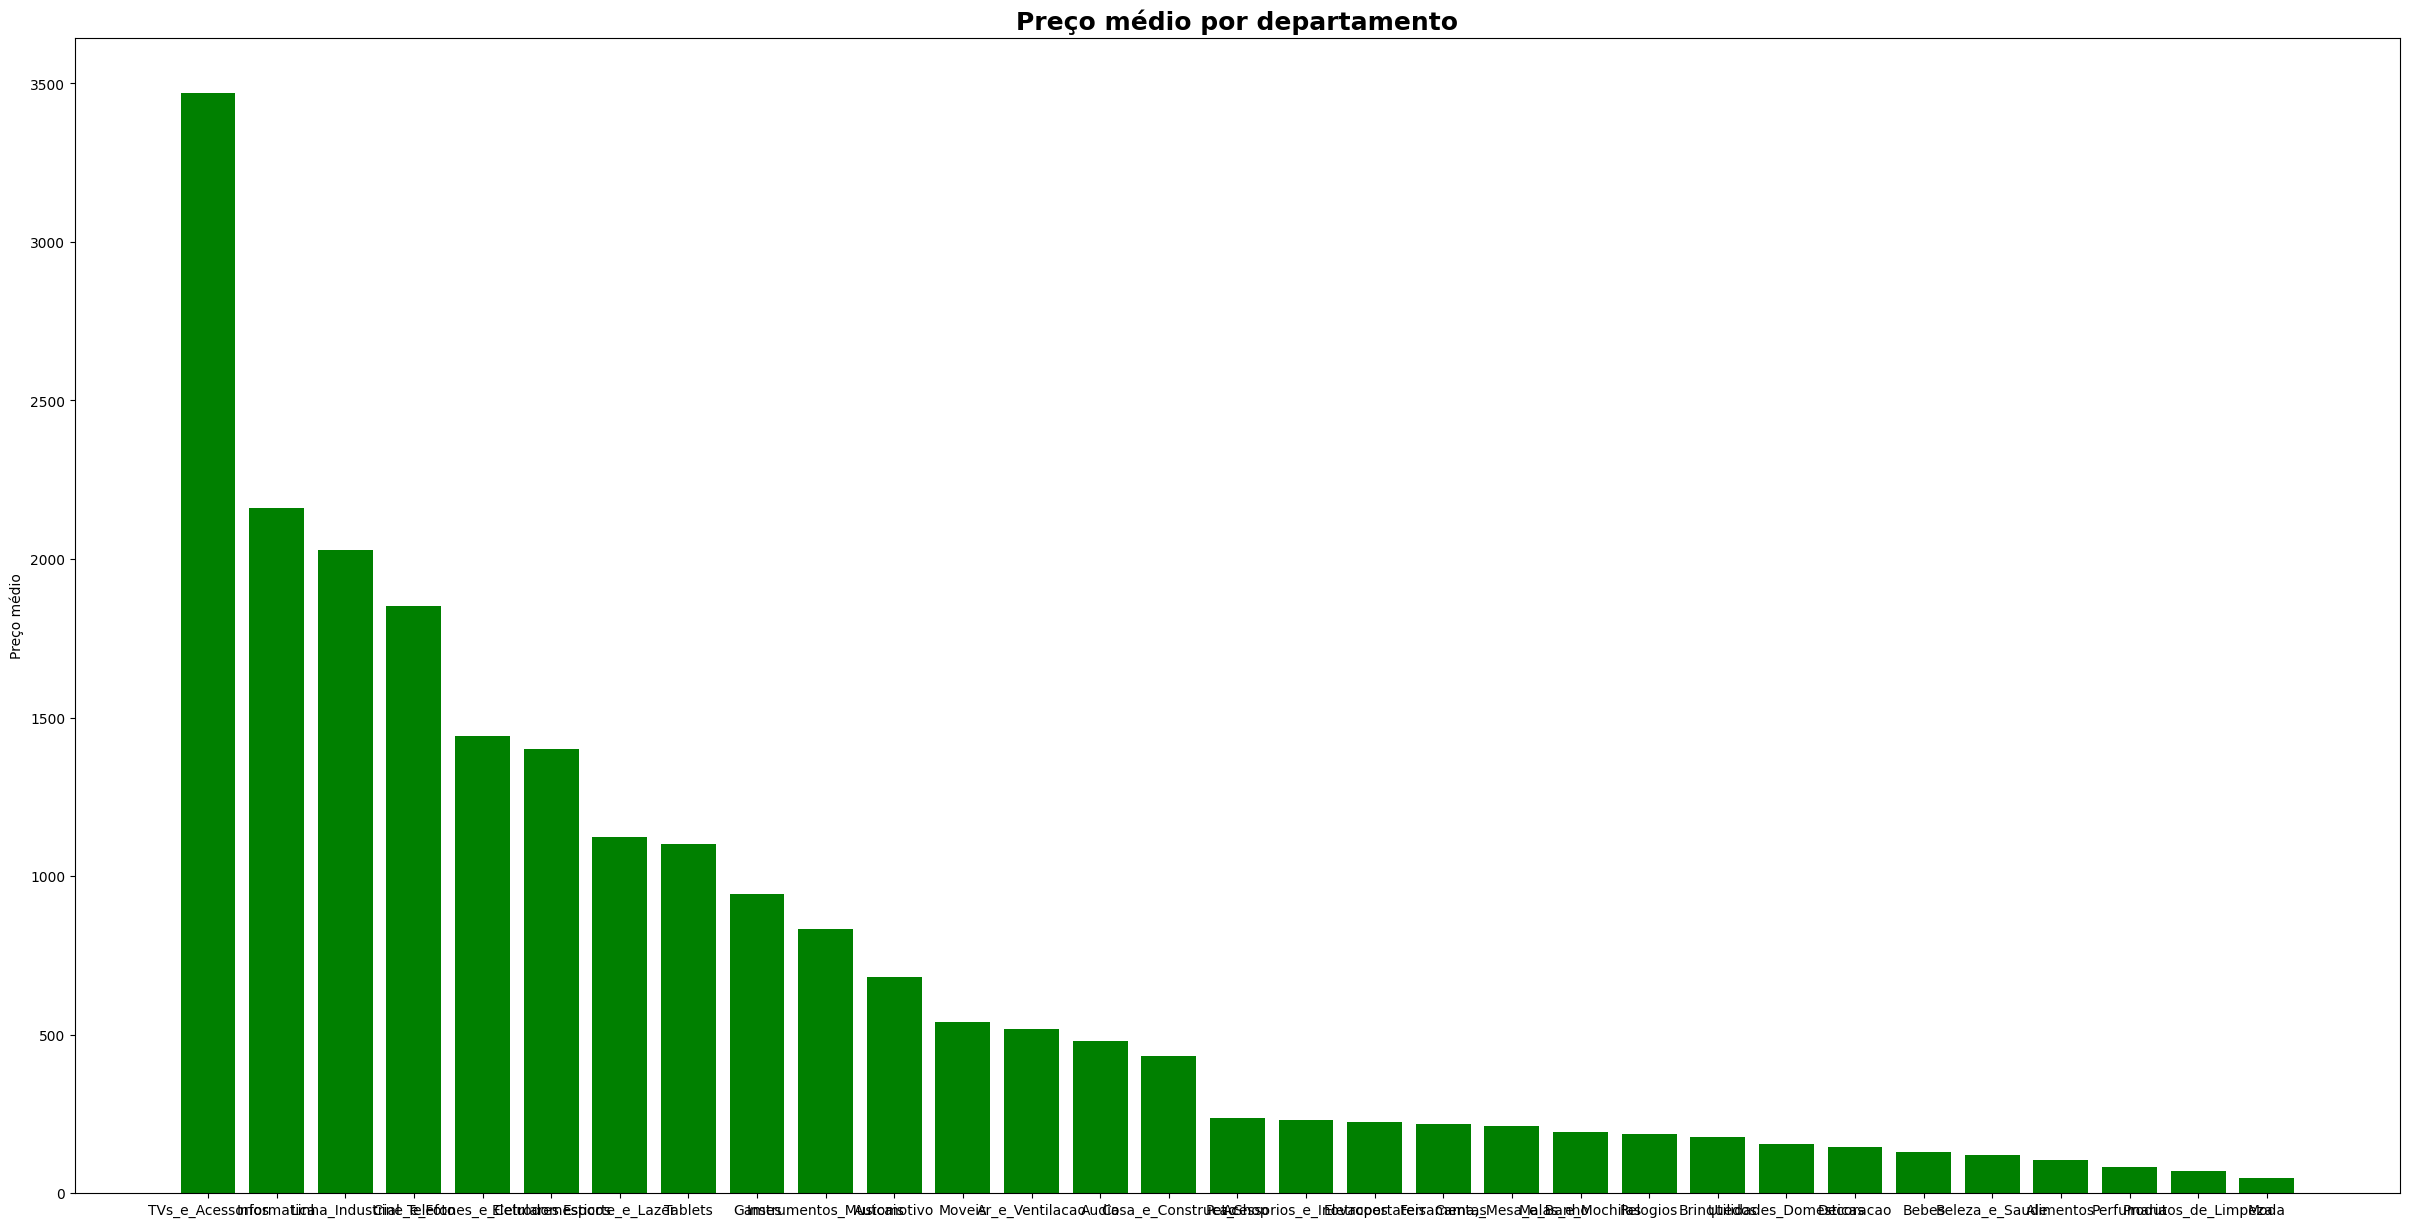

In [43]:
fig = plt.figure(figsize=(30,15)) #tamanho da figura
#Primeiro vem dados para eixo 'x' --- 2° dados 'numeros' para eixo 'y'
plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")

plt.ylabel("Preço médio") #titulo do eixo 'y'

plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black") #especificações do titulo principal

### Plotelli
***usando a biblioteca***

In [44]:
#Instalando biblioteca
%pip install plotly
%pip install cufflinks
%pip install chart-studio

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [45]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [46]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [47]:
px.line(venda_por_data, x = "Data", y= "idcompra")

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [48]:
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [49]:
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete" )